<a href="https://colab.research.google.com/github/praveen3103/BVRIT-HEALTH/blob/main/VKP_BVRIT_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model Implementation for VKP

# Importing Modules

In [ ]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading Dataset from Excel Sheet

In [ ]:
# Reading Dataset from Excel Sheet
dataset=pd.read_excel('main_data.xlsx')
print (dataset)

         Vata  Pitta  Kapha  Age Gender  V  K  P
0       364.0  336.0  322.0   30      M  0  1  0
1       330.0  335.0  338.0   30      M  1  1  1
2       399.0  401.0  407.0   30      M  1  0  1
3       466.0  468.0  469.0   30      M  0  1  0
4       504.0  503.0  507.0   30      M  0  0  0
...       ...    ...    ...  ...    ... .. .. ..
103031  447.0  490.0  407.0   23      M  1  1  1
103032  404.0  447.0  375.0   23      M  1  1  1
103033  374.0  422.0  332.0   23      M  1  1  1
103034  363.0  425.0  310.0   23      M  0  0  1
103035  359.0  440.0  291.0   23      M  0  1  1

[103036 rows x 8 columns]


# Identifying Independent and Dependent Variables

In [ ]:
# Identifying Independent Variables and Dependent Variables
X=dataset.iloc[:,:-3].values
y_v=dataset.iloc[:,-3].values
print (X)
print (y_v)

[[364.0 336.0 322.0 30 'M']
 [330.0 335.0 338.0 30 'M']
 [399.0 401.0 407.0 30 'M']
 ...
 [374.0 422.0 332.0 23 'M']
 [363.0 425.0 310.0 23 'M']
 [359.0 440.0 291.0 23 'M']]
[0 1 1 ... 1 0 0]


In [ ]:
y_k=dataset.iloc[:,-2].values
print (y_k)

[1 1 0 ... 1 0 1]


In [ ]:
y_p=dataset.iloc[:,-1].values
print (y_p)

[0 1 1 ... 1 1 1]


# Data Pre-Processing - Missing Values

In [ ]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :4])
X[:, :4] = imputer.transform(X[:, :4])
print(X)

[[364.0 336.0 322.0 30.0 'M']
 [330.0 335.0 338.0 30.0 'M']
 [399.0 401.0 407.0 30.0 'M']
 ...
 [374.0 422.0 332.0 23.0 'M']
 [363.0 425.0 310.0 23.0 'M']
 [359.0 440.0 291.0 23.0 'M']]


#Data Pre-Processing - Categorical Data

In [ ]:
# Non-Numeric Data has to be encoded
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 1.0 364.0 336.0 322.0 30.0]
 [0.0 1.0 330.0 335.0 338.0 30.0]
 [0.0 1.0 399.0 401.0 407.0 30.0]
 ...
 [0.0 1.0 374.0 422.0 332.0 23.0]
 [0.0 1.0 363.0 425.0 310.0 23.0]
 [0.0 1.0 359.0 440.0 291.0 23.0]]


# Data Pre-Processing - Training and Testing Data Split

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X, y_v, test_size = 0.3, random_state = 1)
Xk_train, Xk_test, yk_train, yk_test = train_test_split(X, y_k, test_size = 0.3, random_state = 1)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X, y_p, test_size = 0.3, random_state = 1)
print(Xv_train,yv_train)
print(Xv_test,yv_test)
print(Xk_train,yk_train)
print(Xk_test,yk_test)
print(Xp_train,yp_train)
print(Xp_test,yp_test)

[[0.0 1.0 733.0 478.0 424.0 28.0]
 [0.0 1.0 977.0 978.0 682.0 34.0]
 [0.0 1.0 506.0 505.0 489.0 24.0]
 ...
 [0.0 1.0 868.0 836.0 676.0 32.0]
 [0.0 1.0 438.0 435.0 426.0 30.0]
 [0.0 1.0 789.0 623.0 773.0 22.0]] [0 1 1 ... 1 0 0]
[[1.0 0.0 417.0 458.0 476.0 28.0]
 [1.0 0.0 473.0 489.0 477.0 26.0]
 [0.0 1.0 503.0 515.0 515.0 24.0]
 ...
 [0.0 1.0 497.0 420.0 503.0 22.0]
 [0.0 1.0 584.0 806.0 793.0 30.0]
 [1.0 0.0 559.0 533.0 486.0 28.0]] [0 0 1 ... 1 0 0]
[[0.0 1.0 733.0 478.0 424.0 28.0]
 [0.0 1.0 977.0 978.0 682.0 34.0]
 [0.0 1.0 506.0 505.0 489.0 24.0]
 ...
 [0.0 1.0 868.0 836.0 676.0 32.0]
 [0.0 1.0 438.0 435.0 426.0 30.0]
 [0.0 1.0 789.0 623.0 773.0 22.0]] [1 1 1 ... 1 1 0]
[[1.0 0.0 417.0 458.0 476.0 28.0]
 [1.0 0.0 473.0 489.0 477.0 26.0]
 [0.0 1.0 503.0 515.0 515.0 24.0]
 ...
 [0.0 1.0 497.0 420.0 503.0 22.0]
 [0.0 1.0 584.0 806.0 793.0 30.0]
 [1.0 0.0 559.0 533.0 486.0 28.0]] [0 0 1 ... 1 1 0]
[[0.0 1.0 733.0 478.0 424.0 28.0]
 [0.0 1.0 977.0 978.0 682.0 34.0]
 [0.0 1.0 506.0 505.

# Building Logistic Regression Model

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_v = LogisticRegression(random_state = 0)
classifier_v.fit(Xv_train, yv_train)
classifier_k = LogisticRegression(random_state = 0)
classifier_k.fit(Xk_train, yk_train)
classifier_p = LogisticRegression(random_state = 0)
classifier_p.fit(Xp_train, yp_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction of Model

In [ ]:
yv_pred = classifier.predict(Xv_test)
print (yv_pred)
yk_pred = classifier.predict(Xk_test)
print (yk_pred)
yp_pred = classifier.predict(Xp_test)
print (yp_pred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# Performance Statstics

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

vcm = confusion_matrix(yv_test, yv_pred)
print(vcm)
accuracy_score(yv_test, yv_pred)

kcm = confusion_matrix(yk_test, yk_pred)
print(kcm)
accuracy_score(yk_test, yk_pred)

pcm = confusion_matrix(yp_test, yp_pred)
print(pcm)
accuracy_score(yp_test, yp_pred)

[[16005   103]
 [14683   120]]
[[16090    99]
 [14598   124]]
[[16164    93]
 [14524   130]]


0.527126265730646

# Vata - Performance 

Text(0.5, 257.44, 'Predicted label')

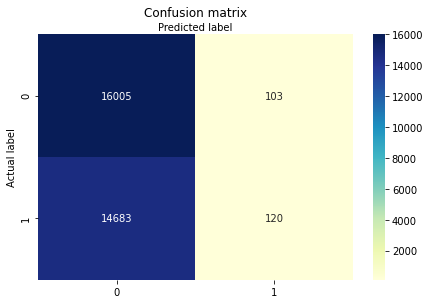

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # 0 - Vatha is in Control, 1 - Vatha is higher
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(vcm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(yv_test, yv_pred))
print("Precision:",metrics.precision_score(yv_test, yv_pred))
print("Recall:",metrics.recall_score(yv_test, yv_pred))

Accuracy: 0.5216589563585778
Precision: 0.5381165919282511
Recall: 0.008106464905762346


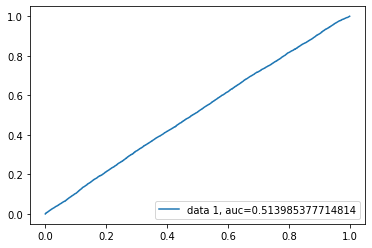

In [ ]:
yv_pred_proba = classifier.predict_proba(Xv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yv_test,  yv_pred_proba)
auc = metrics.roc_auc_score(yv_test, yv_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Kapha - Performance


Text(0.5, 257.44, 'Predicted label')

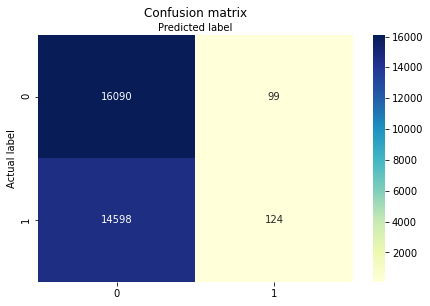

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # 0 - Kapha is in Control, 1 - Kapha is higher
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(kcm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(yk_test, yk_pred))
print("Precision:",metrics.precision_score(yk_test, yk_pred))
print("Recall:",metrics.recall_score(yk_test, yk_pred))

Accuracy: 0.5245381902882469
Precision: 0.5560538116591929
Recall: 0.008422768645564462


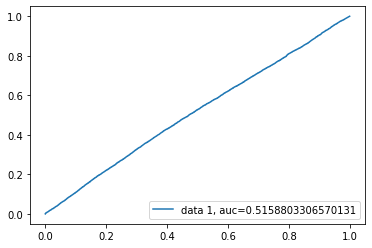

In [ ]:
yk_pred_proba = classifier.predict_proba(Xk_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yk_test,  yk_pred_proba)
auc = metrics.roc_auc_score(yk_test, yk_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Pitta - Performance

Text(0.5, 257.44, 'Predicted label')

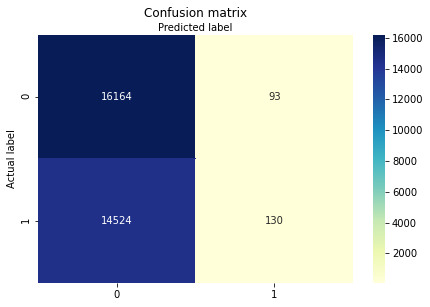

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # 0 - Pitta is in Control, 1 - Pitta is higher
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(pcm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(yp_test, yp_pred))
print("Precision:",metrics.precision_score(yp_test, yp_pred))
print("Recall:",metrics.recall_score(yp_test, yp_pred))

Accuracy: 0.527126265730646
Precision: 0.5829596412556054
Recall: 0.008871297939129249


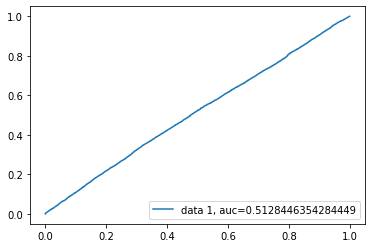

In [ ]:
yp_pred_proba = classifier.predict_proba(Xp_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yp_test,  yp_pred_proba)
auc = metrics.roc_auc_score(yp_test, yp_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()